In [3]:
# data visualisation and manipulation
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from wordcloud import WordCloud
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer # lammatizer from WordNet
nltk.download('wordnet')
nltk.download('omw-1.4')
# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dharm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dharm\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:

def importing_Lyrics_df():
    df = pd.read_csv('C:/Users/dharm/OneDrive - IMC/FH Krems/4th sem/datascience capstone/NLP_ML_PROJECT/data/preprocessed/Lyrics.csv',on_bad_lines='skip')
    return df

In [5]:
stop_list = []
stop_list.extend(stopwords.words(['hungarian','swedish','kazakh','norwegian','finnish','arabic','indonesian','portuguese','turkish','azerbaijani', 'slovene', 'spanish', 'danish', 'nepali', 'romanian', 'greek', 'dutch', 'README', 'tajik', 'german', 'english', 'russian', 'french', 'italian']))
stop_list.extend(['yo','dont','nigga','uh', 'got', 'oh', 'im', 'na', 'from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be',
         'know', 'good', 'go', 'get', 'ah', 'bout','yeah','le','ayy','u','bitch','eh','wa',
         'do', 'uuu','done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot',
         'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
    

In [6]:
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_list and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

In [7]:
df = importing_Lyrics_df()

In [8]:
# time taking
df['Cleaned_LYRICS']=df['LYRICS'].apply(clean_text)

In [9]:
df.head()

,ARTIST_NAME,ARTIST_URL,SONG_NAME,SONG_URL,LYRICS,words,Cleaned_LYRICS
0,03 greedo,https://www.azlyrics.com/19/03greedo.html,sweet lady,https://www.azlyrics.com/lyrics/03greedo/sweet...,"its only one, 03, i'm from grape street, where...","['one', '03', 'im', 'grape', 'street', 'gslide...",grape street g-slide sweet shay shay like dark...
1,03 greedo,https://www.azlyrics.com/19/03greedo.html,mafia business,https://www.azlyrics.com/lyrics/03greedo/mafia...,"you gonna make me put you in a suit and tie, s...","['gonna', 'make', 'put', 'suit', 'tie', 'stead...",suit steady speakin 'bout work business busine...
2,03 greedo,https://www.azlyrics.com/19/03greedo.html,paranoid,https://www.azlyrics.com/lyrics/03greedo/paran...,"we could kill it, yeah, we could, we could, we...","['could', 'kill', 'it', 'yeah', 'radio', 'make...",kill kill radio killer music dealer song still...
3,03 greedo,https://www.azlyrics.com/19/03greedo.html,never bend,https://www.azlyrics.com/lyrics/03greedo/never...,"yeah, you lil bitch ass niggas steady speaking...","['yeah', 'lil', 'bitch', 'as', 'nigga', 'stead...",nigga steady speaking project wall talk like w...
4,03 greedo,https://www.azlyrics.com/19/03greedo.html,prayer for my lost,https://www.azlyrics.com/lyrics/03greedo/praye...,"x loaded up bro, never see me in the church, p...","['x', 'loaded', 'bro', 'never', 'see', 'church...",loaded never church prayer lost beat boom pray...


In [10]:
vect =TfidfVectorizer(stop_words=stop_list,max_features=1000)

In [11]:
vect_text=vect.fit_transform(df['Cleaned_LYRICS'])

C:\Users\dharm\OneDrive - IMC\FH Krems\4th sem\datascience capstone\NLP_ML_PROJECT\venv\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['100', '103', '112', '22', '49', '52', '83', 'ada', 'added', 'anoncvs', 'applications', 'arlc', 'augmented', 'azerbaijani', 'backend', 'baiknya', 'berkali', 'cgi', 'contains', 'corpus', 'corrected', 'cvsweb', 'english', 'frequency', 'german', 'github', 'grammatical', 'greek', 'high', 'http', 'https', 'ignored', 'indonesian', 'issues', 'kali', 'kazakh', 'kurangnya', 'language', 'languages', 'list', 'lists', 'mata', 'nepali', 'nltk', 'nltk_data', 'obtained', 'olah', 'onların', 'org', 'pgsql', 'postgresql', 'printr', 'pull', 'resources', 'retrieval', 'ro', 'romanian', 'sekurang', 'setidak', 'several', 'snowball', 'src', 'stop', 'stopwords', 'tama', 'text', 'tidaknya', 'usually', 'words', 'δι', 'арбаң', 'арсалаң', 'афташ', 'бай', 

In [12]:
print(vect_text.shape)
print(vect_text)

(147892, 1000)
  (0, 115)	0.05785914576810423
  (0, 963)	0.14312222374620706
  (0, 855)	0.03348559029986347
  (0, 344)	0.04169405811784939
  (0, 554)	0.02949624554694575
  (0, 715)	0.03494468742754527
  (0, 311)	0.03655673549392283
  (0, 37)	0.1775644612377427
  (0, 998)	0.035860246142762724
  (0, 941)	0.03420328532137343
  (0, 329)	0.0473776768482653
  (0, 964)	0.03534510432022648
  (0, 39)	0.04855338089954928
  (0, 366)	0.04024057947508202
  (0, 161)	0.04685808543038492
  (0, 486)	0.03844618249413399
  (0, 660)	0.0592979166703351
  (0, 679)	0.03652738005780879
  (0, 784)	0.04372501566371418
  (0, 637)	0.0374900238834119
  (0, 75)	0.042877016286196404
  (0, 173)	0.0471688294745645
  (0, 704)	0.04612161651879203
  (0, 172)	0.044573096967191396
  (0, 151)	0.045554233169457
  :	:
  (147890, 486)	0.055268060838697786
  (147890, 784)	0.06285661329948393
  (147890, 75)	0.43146304097532534
  (147890, 390)	0.2063521460609232
  (147890, 36)	0.03168904649710556
  (147890, 475)	0.097792297670201

In [13]:
idf=vect.idf_

In [14]:
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
#print(l)
print(l[0],l[-1])
# like is most common and wey is least common

like neoreul


C:\Users\dharm\OneDrive - IMC\FH Krems\4th sem\datascience capstone\NLP_ML_PROJECT\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [16]:
print(lsa_top)
print(lsa_top.shape) 

[[ 0.38533787 -0.18589908  0.03560597 ...  0.01369723 -0.01193692
   0.00397734]
 [ 0.21398012 -0.10543868  0.00491265 ... -0.04056792 -0.00544482
  -0.00119003]
 [ 0.21716464 -0.14186529  0.00280316 ... -0.01418914  0.00288194
   0.01611505]
 ...
 [ 0.17345482 -0.01975757  0.0336506  ... -0.08915622 -0.00540373
   0.00727617]
 [ 0.16541288 -0.07822664 -0.00838423 ...  0.04883247  0.00615904
   0.01037179]
 [ 0.11048834  0.04896815 -0.00701535 ...  0.00601529  0.00515175
   0.00661334]]
(147892, 10)


In [17]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)
  

Document 0 :
Topic  0  :  38.53378656875574
Topic  1  :  -18.58990799640928
Topic  2  :  3.560596831006265
Topic  3  :  17.96535927219321
Topic  4  :  47.58569675091024
Topic  5  :  -5.407032871242552
Topic  6  :  -19.714725527756073
Topic  7  :  1.3697228630161187
Topic  8  :  -1.1936921625102794
Topic  9  :  0.39773431728956987


In [18]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 1.41740231e-02  7.53997172e-03  1.98395433e-02 ...  6.30274727e-03
   3.30723866e-02  5.49848398e-03]
 [-7.51909334e-03 -6.22068374e-03 -1.55289380e-03 ... -6.34219253e-03
  -2.50751414e-02 -6.37903549e-03]
 [-1.60271711e-03  6.97137290e-04 -3.45238881e-03 ...  3.89893012e-03
   1.78359926e-04  1.09127255e-03]
 ...
 [ 5.07515618e-03 -2.52415790e-03  3.73340699e-03 ... -3.04961669e-03
  -2.34854350e-02 -2.97858769e-03]
 [ 2.42093567e-03 -9.81824357e-04 -4.87989972e-05 ...  3.06671234e-03
   1.67650380e-03 -9.33474072e-05]
 [ 4.05316111e-03 -8.72758525e-04 -2.13727686e-03 ...  1.71411697e-03
   4.82532446e-03  5.42189870e-04]]


Topic 0:  ['love', 'like', 'baby', 'time', 'never', 'cause', 'feel', 'back', 'life', 'girl', 'heart', 'tell', 'thing', 'away', 'night']


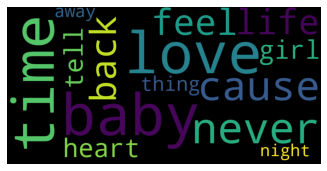



Topic 1:  ['love', 'baby', 'heart', 'true', 'forever', 'kiss', 'loving', 'darling', 'sweet', 'give', 'arm', 'lover', 'someone', 'together', 'babe']


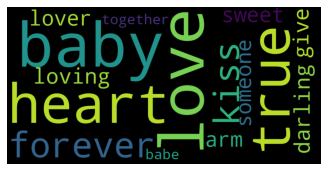



Topic 2:  ['amor', 'solo', 'quiero', 'vida', 'baby', 'corazon', 'siempre', 'nunca', 'aqui', 'tiempo', 'bien', 'ahora', 'mundo', 'puedo', 'noche']


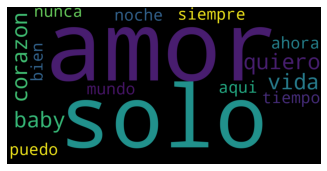



Topic 3:  ['baby', 'girl', 'like', 'shit', 'fuck', 'money', 'tell', 'crazy', 'cause', 'body', 'little', 'babe', 'tonight', 'lady', 'rock']


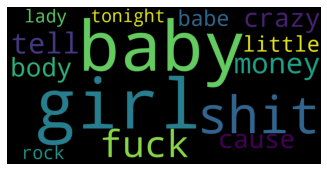



Topic 4:  ['like', 'love', 'shit', 'fuck', 'money', 'girl', 'real', 'fuckin', 'pussy', 'fucking', 'dick', 'tryna', 'game', 'cause', 'damn']


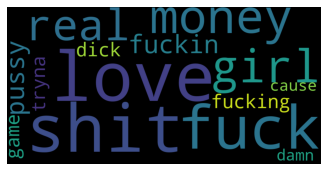



Topic 5:  ['comme', 'tout', 'plus', 'quand', 'fait', 'faire', 'bien', 'meme', 'tous', 'rien', 'sans', 'fais', 'veux', 'trop', 'amour']


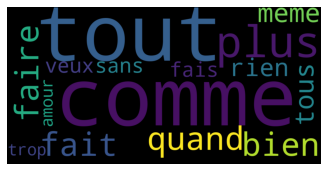



Topic 6:  ['girl', 'time', 'back', 'said', 'fuck', 'shit', 'little', 'tell', 'money', 'cause', 'never', 'give', 'thing', 'well', 'friend']


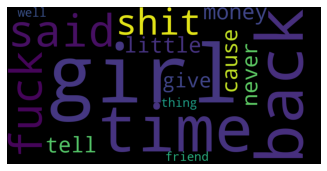



Topic 7:  ['girl', 'like', 'feel', 'night', 'world', 'tonight', 'little', 'comme', 'heart', 'amor', 'tout', 'eye', 'light', 'plus', 'dance']


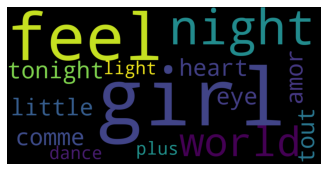



Topic 8:  ['solo', 'quiero', 'girl', 'ahora', 'tiempo', 'dice', 'stare', 'night', 'fine', 'world', 'siempre', 'noche', 'light', 'tonight', 'life']


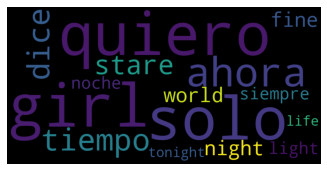



Topic 9:  ['yang', 'back', 'night', 'light', 'life', 'lang', 'home', 'song', 'lord', 'long', 'hand', 'time', 'sing', 'heart', 'tonight']


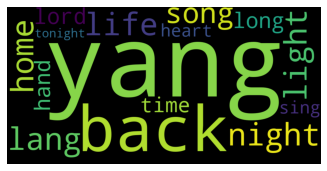

In [23]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:15]
    top_terms_list=list(dict(sorted_words).keys())
    wordcloud = WordCloud(width = 1000, height = 500).generate((" ").join(top_terms_list))
    with open("topics.txt", "a+") as f:
        f.seek(0)
        # If file is not empty then append '\n'
        data = f.read(100)
        if len(data) > 0 :
            f.write("\n")
        # Append text at the end of file
        f.write("Topic "+str(i)+": {0}".format(top_terms_list))
    print("Topic "+str(i)+": ",top_terms_list)
    plt.figure(figsize=(5,3))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    plt.close()
    #print("Topic "+str(i)+": ")
    #for t in sorted_words:
     #   print(t[0], end=" ")
    print("\n")

In [59]:
len(lsa_model.components_)

10